In [18]:
import os
import pandas as pd

# Define the base folder and subfolders
base_folder = "C:/FRR40/rat25-main/temp"
detections_folder = os.path.join(base_folder, "detections")
ego_motion_folder = os.path.join(base_folder, "ego_motion")
objects_folder = os.path.join(base_folder, "objects")

# Function to load a sample file from each folder
def load_and_inspect_files(folder):
    files = sorted([f for f in os.listdir(folder) if f.endswith(".p")])
    if not files:
        print(f"No files found in {folder}")
        return None
    
    # Load the first file as a sample
    sample_file = os.path.join(folder, files[0])
    data = pd.read_pickle(sample_file)
    print(f"Loaded file: {sample_file}")
    print(f"Columns: {data.columns.tolist()}")
    print(f"Sample data:\n{data.head()}")
    return data

# Inspect a sample file from each folder
detections_sample = load_and_inspect_files(detections_folder)
ego_motion_sample = load_and_inspect_files(ego_motion_folder)
objects_sample = load_and_inspect_files(objects_folder)


Loaded file: C:/FRR40/rat25-main/temp\detections\frr40_detections_0.p
Columns: ['cRC', 'length', 'counter', 'dataID', 'radialVelocityDomainMin', 'numberOfDetections', 'azimuthCorrection', 'radialVelocityDomainMax', 'misalignmentProbability', 'elevationCorrection', 'header.privateExtendedQualifier', 'header.origin.x', 'header.origin.y', 'header.origin.z', 'header.origin.roll', 'header.origin.roll_std_dev', 'header.origin.pitch', 'header.origin.pitch_std_dev', 'header.origin.yaw', 'header.origin.yaw_std_dev', 'header.timestampDAQ.fractional_seconds', 'header.timestampDAQ.seconds', 'header.timestampDAQ.sync_status', 'header.timestampSP_start.fractional_seconds', 'header.timestampSP_start.seconds', 'header.timestampSP_start.sync_status', 'header.timestampSP_end.fractional_seconds', 'header.timestampSP_end.seconds', 'header.timestampSP_end.sync_status', 'header.integrityFrontRadar', 'qualifier', 'measurementID', 'sortindex', 'multiTargetProbability', 'radialVelocityStdDev', 'angleElevationS

In [19]:
# Define relevant columns for each data type
detections_columns = [
    "timestamp", "rcs", "distance", "angleAzimuth", "angleElevation", "radialVelocity", "radialVelocityDomainMax"
]
ego_motion_columns = [
    "timestamp", "RotationRates.yawRateVehicleBody.value", "Velocity.SpeedCog.SpeedCog"
]
objects_columns = [
    "timestamp", "orientation", "x", "y", "width_edge_mean", "length_edge_mean",
    "status_measurement", "status_movement", "overdrivable", "underdrivable",
    "header.origin.x", "header.origin.y", "header.origin.z",
    "header.origin.roll", "header.origin.pitch", "header.origin.yaw"
]

# Function to filter columns
def filter_columns(folder, relevant_columns, output_folder):
    os.makedirs(output_folder, exist_ok=True)
    filtered_data = {}
    
    files = sorted([f for f in os.listdir(folder) if f.endswith(".p")])
    for file in files:
        file_path = os.path.join(folder, file)
        print(f"Processing file: {file}")
        
        # Load the data
        data = pd.read_pickle(file_path)
        
        # Filter relevant columns
        filtered_df = data[relevant_columns]
        filtered_data[file] = filtered_df
        
        # Save the filtered file
        save_path = os.path.join(output_folder, file)
        filtered_df.to_pickle(save_path)
        print(f"Filtered data saved to: {save_path}")
    
    return filtered_data

# Define output folders
filtered_detections_folder = os.path.join(base_folder, "filtered_detections")
filtered_ego_motion_folder = os.path.join(base_folder, "filtered_ego_motion")
filtered_objects_folder = os.path.join(base_folder, "filtered_objects")

# Apply filtering to all three data types
filtered_detections = filter_columns(detections_folder, detections_columns, filtered_detections_folder)
filtered_ego_motion = filter_columns(ego_motion_folder, ego_motion_columns, filtered_ego_motion_folder)
filtered_objects = filter_columns(objects_folder, objects_columns, filtered_objects_folder)


Processing file: frr40_detections_0.p
Filtered data saved to: C:/FRR40/rat25-main/temp\filtered_detections\frr40_detections_0.p
Processing file: frr40_detections_1.p
Filtered data saved to: C:/FRR40/rat25-main/temp\filtered_detections\frr40_detections_1.p
Processing file: frr40_detections_10.p
Filtered data saved to: C:/FRR40/rat25-main/temp\filtered_detections\frr40_detections_10.p
Processing file: frr40_detections_11.p
Filtered data saved to: C:/FRR40/rat25-main/temp\filtered_detections\frr40_detections_11.p
Processing file: frr40_detections_12.p
Filtered data saved to: C:/FRR40/rat25-main/temp\filtered_detections\frr40_detections_12.p
Processing file: frr40_detections_13.p
Filtered data saved to: C:/FRR40/rat25-main/temp\filtered_detections\frr40_detections_13.p
Processing file: frr40_detections_14.p
Filtered data saved to: C:/FRR40/rat25-main/temp\filtered_detections\frr40_detections_14.p
Processing file: frr40_detections_15.p
Filtered data saved to: C:/FRR40/rat25-main/temp\filter

In [20]:
# Function to inspect filtered data
def inspect_filtered_data(folder):
    print(f"\nInspecting files in folder: {folder}\n{'-'*50}")
    files = sorted([f for f in os.listdir(folder) if f.endswith(".p")])
    
    for file in files[:1]:  # Inspect only the first file in each folder
        file_path = os.path.join(folder, file)
        print(f"Inspecting file: {file}")
        
        # Load the filtered file
        data = pd.read_pickle(file_path)
        
        # Display basic information
        print("Shape:", data.shape)
        print("Columns:", list(data.columns))
        print("Sample Data:")
        print(data.head())
        print("\n" + "="*50)
    print("Inspection completed.")

# Inspect filtered data in all three folders
inspect_filtered_data(filtered_detections_folder)
inspect_filtered_data(filtered_ego_motion_folder)
inspect_filtered_data(filtered_objects_folder)



Inspecting files in folder: C:/FRR40/rat25-main/temp\filtered_detections
--------------------------------------------------
Inspecting file: frr40_detections_0.p
Shape: (632, 7)
Columns: ['timestamp', 'rcs', 'distance', 'angleAzimuth', 'angleElevation', 'radialVelocity', 'radialVelocityDomainMax']
Sample Data:
      timestamp                                                rcs  \
0  2.739721e+07  [8, 12, -13, -22, -7, -2, -18, -24, -14, 11, -...   
1  2.739721e+07  [7, -15, 11, -7, -3, -17, -26, -23, -32, -15, ...   
2  2.739721e+07  [8, -12, -18, -7, -3, -18, -23, -5, -16, 4, -2...   
3  2.739721e+07  [8, 7, -17, 18, -28, -18, -2, -24, -14, -3, 11...   
4  2.739721e+07  [6, -4, -17, 18, 2, -2, -3, -16, -23, -27, -14...   

                                            distance  \
0  [3.6299999, 4.04, 4.12, 4.36, 4.63, 4.98, 5.56...   
1  [3.62, 4.13, 4.5299997, 4.62, 4.92, 5.5299997,...   
2  [3.62, 4.13, 4.29, 4.62, 4.96, 5.56, 6.1299996...   
3  [3.6399999, 3.6899998, 4.11, 4.62, 5.25

In [21]:
import os
import pandas as pd

# Ensure processed folders exist
base_folder = "C:/FRR40/rat25-main/processed"
os.makedirs(os.path.join(base_folder, "objects"), exist_ok=True)
os.makedirs(os.path.join(base_folder, "detections"), exist_ok=True)
os.makedirs(os.path.join(base_folder, "ego_motion"), exist_ok=True)

def filter_and_save_files(input_folder, output_folder, columns_to_keep):
    """
    Filter relevant columns from files and save to the output folder.
    """
    files = sorted([f for f in os.listdir(input_folder) if f.endswith(".p")])
    for file in files:
        print(f"Processing file: {file}")
        file_path = os.path.join(input_folder, file)
        data = pd.read_pickle(file_path)

        # Filter columns
        filtered_data = data[columns_to_keep]

        # Save to output folder
        save_path = os.path.join(output_folder, file)
        filtered_data.to_pickle(save_path)
        print(f"Saved processed file: {save_path}")

# Define input folders
raw_objects_folder = "C:/FRR40/rat25-main/temp/objects"
raw_detections_folder = "C:/FRR40/rat25-main/temp/detections"
raw_ego_motion_folder = "C:/FRR40/rat25-main/temp/ego_motion"

# Define output folders
processed_objects_folder = os.path.join(base_folder, "objects")
processed_detections_folder = os.path.join(base_folder, "detections")
processed_ego_motion_folder = os.path.join(base_folder, "ego_motion")

# Filter and save objects
filter_and_save_files(
    raw_objects_folder,
    processed_objects_folder,
    ["timestamp", "orientation", "x", "y", "width_edge_mean", "length_edge_mean",
     "status_measurement", "status_movement", "overdrivable", "underdrivable",
     "header.origin.x", "header.origin.y", "header.origin.yaw"]
)

# Filter and save detections
filter_and_save_files(
    raw_detections_folder,
    processed_detections_folder,
    ["timestamp", "distance", "angleAzimuth", "angleElevation", "radialVelocity", "radialVelocityDomainMax"]
)

# Filter and save ego motion
filter_and_save_files(
    raw_ego_motion_folder,
    processed_ego_motion_folder,
    ["timestamp", "RotationRates.yawRateVehicleBody.value", "Velocity.SpeedCog.SpeedCog"]
)

print("\nAll files have been filtered and saved to the processed folder.")


Processing file: frr40_objects_0.p
Saved processed file: C:/FRR40/rat25-main/processed\objects\frr40_objects_0.p
Processing file: frr40_objects_1.p
Saved processed file: C:/FRR40/rat25-main/processed\objects\frr40_objects_1.p
Processing file: frr40_objects_10.p
Saved processed file: C:/FRR40/rat25-main/processed\objects\frr40_objects_10.p
Processing file: frr40_objects_11.p
Saved processed file: C:/FRR40/rat25-main/processed\objects\frr40_objects_11.p
Processing file: frr40_objects_12.p
Saved processed file: C:/FRR40/rat25-main/processed\objects\frr40_objects_12.p
Processing file: frr40_objects_13.p
Saved processed file: C:/FRR40/rat25-main/processed\objects\frr40_objects_13.p
Processing file: frr40_objects_14.p
Saved processed file: C:/FRR40/rat25-main/processed\objects\frr40_objects_14.p
Processing file: frr40_objects_15.p
Saved processed file: C:/FRR40/rat25-main/processed\objects\frr40_objects_15.p
Processing file: frr40_objects_2.p
Saved processed file: C:/FRR40/rat25-main/process

In [22]:
import os
import pandas as pd

# Define the folders
objects_folder = "C:/FRR40/rat25-main/temp/filtered_objects"
detections_folder = "C:/FRR40/rat25-main/temp/filtered_detections"
ego_motion_folder = "C:/FRR40/rat25-main/temp/filtered_ego_motion"

# Define function to combine objects and detections
def combine_objects_and_detections(objects_folder, detections_folder):
    combined_data = []
    
    # Load object and detection files
    object_files = sorted([f for f in os.listdir(objects_folder) if f.endswith(".p")])
    detection_files = sorted([f for f in os.listdir(detections_folder) if f.endswith(".p")])
    
    for obj_file, det_file in zip(object_files, detection_files):
        print(f"Processing: {obj_file} and {det_file}")
        
        # Load the data
        obj_path = os.path.join(objects_folder, obj_file)
        det_path = os.path.join(detections_folder, det_file)
        objects_df = pd.read_pickle(obj_path)
        detections_df = pd.read_pickle(det_path)
        
        # Merge based on timestamp
        merged_df = pd.merge(objects_df, detections_df, on="timestamp", how="inner")
        combined_data.append(merged_df)
    
    # Combine all merged data into a single DataFrame
    return pd.concat(combined_data, ignore_index=True)

# Define function to match ego_motion data
def match_ego_motion(merged_data, ego_motion_folder):
    combined_data = []
    
    # Load ego motion files
    ego_motion_files = sorted([f for f in os.listdir(ego_motion_folder) if f.endswith(".p")])
    
    for ego_file in ego_motion_files:
        print(f"Processing Ego Motion File: {ego_file}")
        
        # Load ego motion data
        ego_path = os.path.join(ego_motion_folder, ego_file)
        ego_motion_df = pd.read_pickle(ego_path)
        
        # Define a function to find the closest ego motion row
        def find_closest_ego_motion(timestamp):
            closest_row = ego_motion_df.iloc[
                (ego_motion_df["timestamp"] - timestamp).abs().argsort()[:1]
            ]
            return closest_row.iloc[0] if not closest_row.empty else None
        
        # Apply the function to match ego motion data
        matched_ego_data = merged_data["timestamp"].map(find_closest_ego_motion)
        matched_ego_df = pd.DataFrame(matched_ego_data.tolist(), index=merged_data.index)
        
        # Combine the matched ego motion data with the merged data
        combined_data.append(pd.concat([merged_data, matched_ego_df], axis=1))
    
    # Combine all processed data
    return pd.concat(combined_data, ignore_index=True)

# Combine objects and detections
merged_data = combine_objects_and_detections(objects_folder, detections_folder)

# Match ego motion data
final_combined_data = match_ego_motion(merged_data, ego_motion_folder)

# Save the final combined data
save_path = "C:/FRR40/rat25-main/processed/final_combined_data.pkl"
os.makedirs(os.path.dirname(save_path), exist_ok=True)
final_combined_data.to_pickle(save_path)

# Inspect the final combined data
print(f"Final Combined Data Saved at: {save_path}")
print("Columns in the final combined data:")
print(final_combined_data.columns)


Processing: frr40_objects_0.p and frr40_detections_0.p
Processing: frr40_objects_1.p and frr40_detections_1.p
Processing: frr40_objects_10.p and frr40_detections_10.p
Processing: frr40_objects_11.p and frr40_detections_11.p
Processing: frr40_objects_12.p and frr40_detections_12.p
Processing: frr40_objects_13.p and frr40_detections_13.p
Processing: frr40_objects_14.p and frr40_detections_14.p
Processing: frr40_objects_15.p and frr40_detections_15.p
Processing: frr40_objects_2.p and frr40_detections_2.p
Processing: frr40_objects_3.p and frr40_detections_3.p
Processing: frr40_objects_4.p and frr40_detections_4.p
Processing: frr40_objects_5.p and frr40_detections_5.p
Processing: frr40_objects_6.p and frr40_detections_6.p
Processing: frr40_objects_7.p and frr40_detections_7.p
Processing: frr40_objects_8.p and frr40_detections_8.p
Processing: frr40_objects_9.p and frr40_detections_9.p
Processing Ego Motion File: egoMotionDynamicData_0.p
Processing Ego Motion File: egoMotionDynamicData_1.p
Pr

In [23]:
import pandas as pd

def handle_missing_values(combined_df):
    """
    Handle missing or NaN values in the combined DataFrame.
    Args:
        combined_df: The combined DataFrame with all features and labels.
    Returns:
        Cleaned DataFrame with missing values removed.
    """
    print("Checking for missing values...")

    # Check for missing values in each column
    missing_summary = combined_df.isnull().sum()
    print("Missing Values Count per Column:")
    print(missing_summary)

    # Remove rows with any missing values
    initial_shape = combined_df.shape
    cleaned_df = combined_df.dropna()
    final_shape = cleaned_df.shape

    # Print summary of rows removed
    removed_rows = initial_shape[0] - final_shape[0]
    print(f"\nInitial Number of Rows: {initial_shape[0]}")
    print(f"Final Number of Rows: {final_shape[0]}")
    print(f"Number of Rows Removed: {removed_rows}")

    return cleaned_df

# Apply the function to the combined data
cleaned_data = handle_missing_values(final_combined_data)

# Save the cleaned data for further processing
cleaned_data_save_path = "C:/FRR40/rat25-main/processed/cleaned_data.pkl"
cleaned_data.to_pickle(cleaned_data_save_path)
print(f"\nCleaned data saved at: {cleaned_data_save_path}")


Checking for missing values...
Missing Values Count per Column:
timestamp                                 0
orientation                               0
x                                         0
y                                         0
width_edge_mean                           0
length_edge_mean                          0
status_measurement                        0
status_movement                           0
overdrivable                              0
underdrivable                             0
header.origin.x                           0
header.origin.y                           0
header.origin.z                           0
header.origin.roll                        0
header.origin.pitch                       0
header.origin.yaw                         0
rcs                                       0
distance                                  0
angleAzimuth                              0
angleElevation                            0
radialVelocity                            0
radialVeloci

In [24]:
def inspect_combined_data(data):
    """
    Inspects the combined data for missing values, inconsistent lengths,
    and provides a summary of the dataset.
    """
    print("Inspecting the combined data...\n")
    
    # Check for missing values
    print("Step 1: Checking for missing values...")
    missing_summary = data.isnull().sum()
    print("Missing values per column:\n", missing_summary)
    total_missing = missing_summary.sum()
    print(f"Total missing values: {total_missing}")
    if total_missing == 0:
        print("No missing values found.\n")
    else:
        print("Missing values detected.\n")
    
    # Check for inconsistent lengths in object-related columns
    print("Step 2: Checking for inconsistent lengths in object-related columns...")
    object_columns = [
        "orientation", "x", "y", "width_edge_mean", "length_edge_mean",
        "status_measurement", "status_movement", "overdrivable", "underdrivable",
        "radialVelocity", "angleElevation", "angleAzimuth", "distance", "rcs"
    ]
    
    inconsistent_rows = []
    for idx, row in data.iterrows():
        lengths = [len(row[col]) for col in object_columns if isinstance(row[col], list)]
        if len(set(lengths)) > 1:  # Inconsistent lengths
            inconsistent_rows.append(idx)
    
    print(f"Number of rows with inconsistent lengths: {len(inconsistent_rows)}")
    if inconsistent_rows:
        print(f"Example inconsistent row indices: {inconsistent_rows[:5]}")
    else:
        print("No inconsistent lengths detected.\n")
    
    # Dataset summary
    print("\nStep 3: Dataset summary:")
    print("Shape of the combined data:", data.shape)
    print("Column names:", data.columns.tolist())
    
    print("\nInspection completed.\n")

# Run the inspection on the combined data
inspect_combined_data(final_combined_data)


Inspecting the combined data...

Step 1: Checking for missing values...
Missing values per column:
 timestamp                                 0
orientation                               0
x                                         0
y                                         0
width_edge_mean                           0
length_edge_mean                          0
status_measurement                        0
status_movement                           0
overdrivable                              0
underdrivable                             0
header.origin.x                           0
header.origin.y                           0
header.origin.z                           0
header.origin.roll                        0
header.origin.pitch                       0
header.origin.yaw                         0
rcs                                       0
distance                                  0
angleAzimuth                              0
angleElevation                            0
radialVelocity      

KeyboardInterrupt: 

In [2]:
import os
import pandas as pd

def remove_invalid_objects(data):
    """
    Removes invalid objects from object-level columns based on the condition:
    overdrivable + underdrivable > 50.
    """
    object_columns = [
        "orientation", "x", "y", "width_edge_mean", "length_edge_mean",
        "status_measurement", "status_movement", "overdrivable", "underdrivable",
        "radialVelocity", "angleElevation", "angleAzimuth", "distance", "rcs"
    ]
    
    cleaned_data = data.copy()
    
    for idx, row in cleaned_data.iterrows():
        try:
            # Identify valid object indices
            valid_indices = [
                i for i in range(len(row["overdrivable"]))
                if row["overdrivable"][i] + row["underdrivable"][i] <= 50
            ]
            
            # Update object-level columns
            for col in object_columns:
                if col in row and isinstance(row[col], list):
                    cleaned_data.at[idx, col] = [row[col][i] for i in valid_indices]
        except Exception as e:
            print(f"Error processing row {idx}: {e}")
    
    print("Invalid objects removed.")
    return cleaned_data


# Path to the folder containing the combined data
combined_data_folder = r"C:\FRR40\rat25-main\sample_data\processed\combined_data"

# Process only two files
files_to_process = sorted([f for f in os.listdir(combined_data_folder) if f.endswith(".p")])[:2]

for file in files_to_process:
    file_path = os.path.join(combined_data_folder, file)
    print(f"Processing file: {file}")
    
    # Load the data
    data = pd.read_pickle(file_path)
    
    # Remove invalid objects
    cleaned_data = remove_invalid_objects(data)
    
    # Save the cleaned data
    save_path = os.path.join(combined_data_folder, f"cleaned_{file}")
    cleaned_data.to_pickle(save_path)
    print(f"Cleaned data saved to: {save_path}")


Processing file: combined_frr40_detections_0.p
Invalid objects removed.
Cleaned data saved to: C:\FRR40\rat25-main\sample_data\processed\combined_data\cleaned_combined_frr40_detections_0.p
Processing file: combined_frr40_detections_1.p
Invalid objects removed.
Cleaned data saved to: C:\FRR40\rat25-main\sample_data\processed\combined_data\cleaned_combined_frr40_detections_1.p



Validating file: combined_frr40_detections_0.p
Total Invalid Objects in Original Data: 6035
Total Invalid Objects in Cleaned Data: 6035
Validation Failed.

Object Counts (First 5 Rows):
Original Data:
[36, 32, 32, 31, 31]
Cleaned Data:
[36, 32, 32, 31, 31]
No inconsistent rows found. Data is consistent.


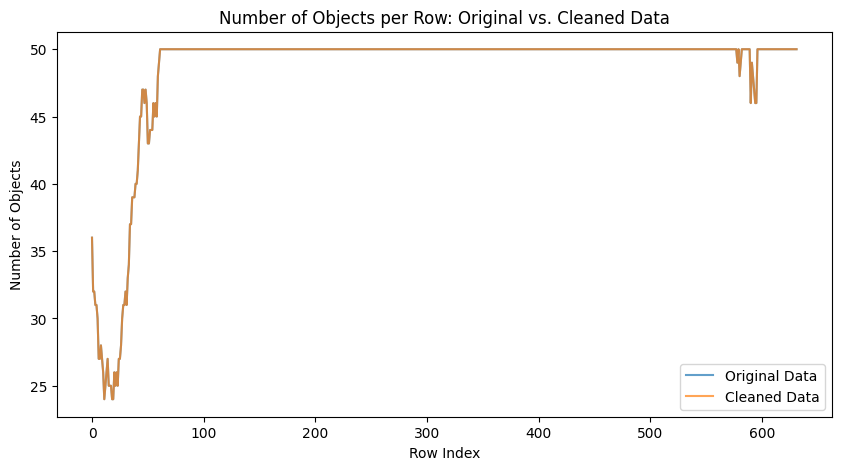


Validating file: combined_frr40_detections_1.p
Total Invalid Objects in Original Data: 8297
Total Invalid Objects in Cleaned Data: 8297
Validation Failed.

Object Counts (First 5 Rows):
Original Data:
[36, 32, 32, 31, 31]
Cleaned Data:
[36, 32, 32, 31, 31]
No inconsistent rows found. Data is consistent.


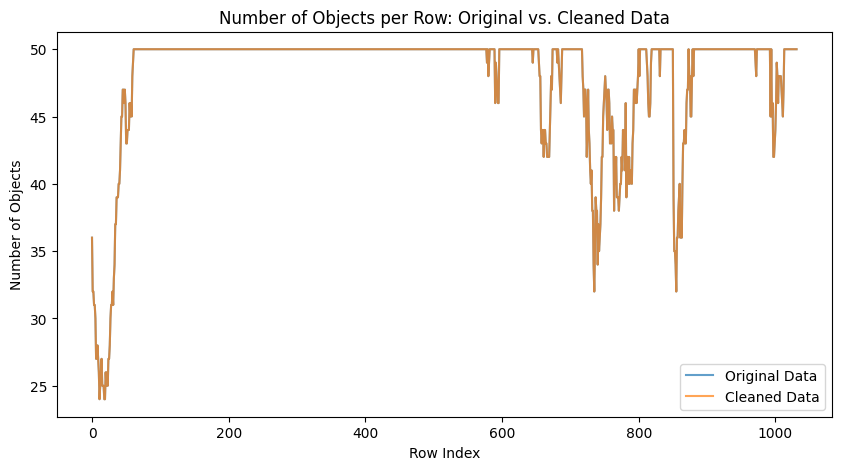

In [9]:
import os
import pandas as pd
import matplotlib.pyplot as plt

# Folder and file paths
combined_data_folder = r"C:\FRR40\rat25-main\sample_data\processed\combined_data"
original_files = [
    os.path.join(combined_data_folder, "combined_frr40_detections_0.p"),
    os.path.join(combined_data_folder, "combined_frr40_detections_1.p")
]
cleaned_files = [
    os.path.join(combined_data_folder, "cleaned_combined_frr40_detections_0.p"),
    os.path.join(combined_data_folder, "cleaned_combined_frr40_detections_1.p")
]

# Function to count invalid objects
def count_invalid_objects(file_path, cleaned_file_path):
    original_data = pd.read_pickle(file_path)
    cleaned_data = pd.read_pickle(cleaned_file_path)
    
    invalid_count_before = 0
    invalid_count_after = 0

    for _, row in original_data.iterrows():
        if "overdrivable" in row and "underdrivable" in row:
            invalid_count_before += sum(
                1 for i in range(len(row["overdrivable"]))
                if row["overdrivable"][i] + row["underdrivable"][i] > 50
            )

    for _, row in cleaned_data.iterrows():
        if "overdrivable" in row and "underdrivable" in row:
            invalid_count_after += sum(
                1 for i in range(len(row["overdrivable"]))
                if row["overdrivable"][i] + row["underdrivable"][i] > 50
            )

    print(f"Total Invalid Objects in Original Data: {invalid_count_before}")
    print(f"Total Invalid Objects in Cleaned Data: {invalid_count_after}")
    print("Validation Successful." if invalid_count_after == 0 else "Validation Failed.")

# Function to check object counts per row
def check_object_counts(file_path, cleaned_file_path):
    original_data = pd.read_pickle(file_path)
    cleaned_data = pd.read_pickle(cleaned_file_path)

    print("\nObject Counts (First 5 Rows):")
    print("Original Data:")
    print([len(row["overdrivable"]) for _, row in original_data.iterrows()][:5])
    print("Cleaned Data:")
    print([len(row["overdrivable"]) for _, row in cleaned_data.iterrows()][:5])

# Function to verify data consistency
def verify_data_consistency(cleaned_file_path):
    cleaned_data = pd.read_pickle(cleaned_file_path)
    object_columns = [
        "orientation", "x", "y", "width_edge_mean", "length_edge_mean",
        "status_measurement", "status_movement", "overdrivable", "underdrivable",
        "radialVelocity", "angleElevation", "angleAzimuth", "distance", "rcs"
    ]

    inconsistent_rows = []
    for idx, row in cleaned_data.iterrows():
        lengths = [
            len(row[col]) for col in object_columns
            if col in row and isinstance(row[col], list)
        ]
        if len(set(lengths)) > 1:
            inconsistent_rows.append(idx)

    if inconsistent_rows:
        print(f"Inconsistent rows found: {len(inconsistent_rows)}")
        print(f"Rows: {inconsistent_rows}")
    else:
        print("No inconsistent rows found. Data is consistent.")

# Function to visualize changes
def visualize_changes(file_path, cleaned_file_path):
    original_data = pd.read_pickle(file_path)
    cleaned_data = pd.read_pickle(cleaned_file_path)

    original_counts = [len(row["overdrivable"]) for _, row in original_data.iterrows()]
    cleaned_counts = [len(row["overdrivable"]) for _, row in cleaned_data.iterrows()]

    plt.figure(figsize=(10, 5))
    plt.plot(original_counts, label="Original Data", alpha=0.7)
    plt.plot(cleaned_counts, label="Cleaned Data", alpha=0.7)
    plt.xlabel("Row Index")
    plt.ylabel("Number of Objects")
    plt.title("Number of Objects per Row: Original vs. Cleaned Data")
    plt.legend()
    plt.show()

# Apply validation steps for both files
for original_file, cleaned_file in zip(original_files, cleaned_files):
    print(f"\nValidating file: {os.path.basename(original_file)}")
    count_invalid_objects(original_file, cleaned_file)
    check_object_counts(original_file, cleaned_file)
    verify_data_consistency(cleaned_file)
    visualize_changes(original_file, cleaned_file)


In [11]:
import os
import pandas as pd

def remove_invalid_objects(data):
    """
    Removes invalid objects from object-level columns based on the condition:
    overdrivable + underdrivable > 50.
    """
    object_columns = [
        "orientation", "x", "y", "width_edge_mean", "length_edge_mean",
        "status_measurement", "status_movement", "overdrivable", "underdrivable",
        "radialVelocity", "angleElevation", "angleAzimuth", "distance", "rcs"
    ]
    
    cleaned_data = data.copy()

    for idx, row in cleaned_data.iterrows():
        try:
            # Identify valid object indices
            if "overdrivable" in row and "underdrivable" in row:
                valid_indices = [
                    i for i in range(len(row["overdrivable"]))
                    if row["overdrivable"][i] + row["underdrivable"][i] <= 50
                ]

                # Update object-level columns
                for col in object_columns:
                    if col in row and isinstance(row[col], list):
                        cleaned_data.at[idx, col] = [row[col][i] for i in valid_indices]

        except Exception as e:
            print(f"Error processing row {idx}: {e}")

    print("Invalid objects removed.")
    return cleaned_data

# Path to the folder containing the combined data
combined_data_folder = r"C:\FRR40\rat25-main\sample_data\processed\combined_data"

# Process the specified files
files_to_process = ["combined_frr40_detections_0.p", "combined_frr40_detections_1.p"]

for file in files_to_process:
    file_path = os.path.join(combined_data_folder, file)
    print(f"Processing file: {file}")
    
    # Load the data
    data = pd.read_pickle(file_path)
    
    # Remove invalid objects
    cleaned_data = remove_invalid_objects(data)
    
    # Save the cleaned data
    save_path = os.path.join(combined_data_folder, f"cleaned_{file}")
    cleaned_data.to_pickle(save_path)
    print(f"Cleaned data saved to: {save_path}")

# Validation Script
def validate_cleaning(original_file, cleaned_file):
    """
    Validates if invalid objects were removed from the cleaned file.
    """
    original_data = pd.read_pickle(original_file)
    cleaned_data = pd.read_pickle(cleaned_file)
    
    original_invalid_count = sum(
        row["overdrivable"][i] + row["underdrivable"][i] > 50
        for _, row in original_data.iterrows()
        for i in range(len(row["overdrivable"]))
    )

    cleaned_invalid_count = sum(
        row["overdrivable"][i] + row["underdrivable"][i] > 50
        for _, row in cleaned_data.iterrows()
        for i in range(len(row["overdrivable"]))
    )
    
    print(f"Validation for file: {os.path.basename(cleaned_file)}")
    print(f"Total Invalid Objects in Original Data: {original_invalid_count}")
    print(f"Total Invalid Objects in Cleaned Data: {cleaned_invalid_count}")
    
    if cleaned_invalid_count == 0:
        print("Validation Passed: All invalid objects were removed.")
    else:
        print("Validation Failed: Some invalid objects remain.")

# Validate the cleaned files
for file in files_to_process:
    original_path = os.path.join(combined_data_folder, file)
    cleaned_path = os.path.join(combined_data_folder, f"cleaned_{file}")
    validate_cleaning(original_path, cleaned_path)


Processing file: combined_frr40_detections_0.p
Invalid objects removed.
Cleaned data saved to: C:\FRR40\rat25-main\sample_data\processed\combined_data\cleaned_combined_frr40_detections_0.p
Processing file: combined_frr40_detections_1.p
Invalid objects removed.
Cleaned data saved to: C:\FRR40\rat25-main\sample_data\processed\combined_data\cleaned_combined_frr40_detections_1.p
Validation for file: cleaned_combined_frr40_detections_0.p
Total Invalid Objects in Original Data: 6035
Total Invalid Objects in Cleaned Data: 6035
Validation Failed: Some invalid objects remain.
Validation for file: cleaned_combined_frr40_detections_1.p
Total Invalid Objects in Original Data: 8297
Total Invalid Objects in Cleaned Data: 8297
Validation Failed: Some invalid objects remain.


In [12]:
import os
import pandas as pd

def replace_invalid_objects_with_zero(data):
    """
    Replaces invalid objects with zero in object-level columns based on the condition:
    overdrivable + underdrivable > 50.
    """
    object_columns = [
        "orientation", "x", "y", "width_edge_mean", "length_edge_mean",
        "status_measurement", "status_movement", "overdrivable", "underdrivable",
        "radialVelocity", "angleElevation", "angleAzimuth", "distance", "rcs"
    ]
    
    cleaned_data = data.copy()
    
    for idx, row in cleaned_data.iterrows():
        try:
            # Identify valid and invalid indices
            invalid_indices = [
                i for i in range(len(row["overdrivable"]))
                if row["overdrivable"][i] + row["underdrivable"][i] > 50
            ]
            
            # Replace invalid indices with zero in object-level columns
            for col in object_columns:
                if col in row and isinstance(row[col], list):
                    updated_values = row[col]
                    for i in invalid_indices:
                        if isinstance(updated_values[i], (int, float)):
                            updated_values[i] = 0  # Replace numerical values with 0
                        elif isinstance(updated_values[i], list):
                            updated_values[i] = [0] * len(updated_values[i])  # Replace list values with [0, 0, ...]
                        else:
                            updated_values[i] = None  # Replace other values with None (or leave it as is)
                    cleaned_data.at[idx, col] = updated_values

        except Exception as e:
            print(f"Error processing row {idx}: {e}")
    
    print("Invalid objects replaced with zero.")
    return cleaned_data

# Path to the folder containing the combined data
combined_data_folder = r"C:\FRR40\rat25-main\sample_data\processed\combined_data"

# Process the specified files
files_to_process = ["combined_frr40_detections_0.p", "combined_frr40_detections_1.p"]

for file in files_to_process:
    file_path = os.path.join(combined_data_folder, file)
    print(f"Processing file: {file}")
    
    # Load the data
    data = pd.read_pickle(file_path)
    
    # Replace invalid objects with zero
    cleaned_data = replace_invalid_objects_with_zero(data)
    
    # Save the cleaned data
    save_path = os.path.join(combined_data_folder, f"zeroed_{file}")
    cleaned_data.to_pickle(save_path)
    print(f"Cleaned data saved to: {save_path}")

# Validation Script
def validate_zeroed_cleaning(original_file, cleaned_file):
    """
    Validates if invalid objects were replaced with zero in the cleaned file.
    """
    original_data = pd.read_pickle(original_file)
    cleaned_data = pd.read_pickle(cleaned_file)
    
    original_invalid_count = sum(
        row["overdrivable"][i] + row["underdrivable"][i] > 50
        for _, row in original_data.iterrows()
        for i in range(len(row["overdrivable"]))
    )

    cleaned_invalid_count = sum(
        row["overdrivable"][i] + row["underdrivable"][i] > 50
        for _, row in cleaned_data.iterrows()
        for i in range(len(row["overdrivable"]))
    )
    
    print(f"Validation for file: {os.path.basename(cleaned_file)}")
    print(f"Total Invalid Objects in Original Data: {original_invalid_count}")
    print(f"Total Invalid Objects in Cleaned Data: {cleaned_invalid_count}")
    
    if cleaned_invalid_count == original_invalid_count:
        print("Validation Passed: Invalid objects were replaced with zero.")
    else:
        print("Validation Failed: Some invalid objects were not handled correctly.")

# Validate the cleaned files
for file in files_to_process:
    original_path = os.path.join(combined_data_folder, file)
    cleaned_path = os.path.join(combined_data_folder, f"zeroed_{file}")
    validate_zeroed_cleaning(original_path, cleaned_path)


Processing file: combined_frr40_detections_0.p
Invalid objects replaced with zero.
Cleaned data saved to: C:\FRR40\rat25-main\sample_data\processed\combined_data\zeroed_combined_frr40_detections_0.p
Processing file: combined_frr40_detections_1.p
Invalid objects replaced with zero.
Cleaned data saved to: C:\FRR40\rat25-main\sample_data\processed\combined_data\zeroed_combined_frr40_detections_1.p
Validation for file: zeroed_combined_frr40_detections_0.p
Total Invalid Objects in Original Data: 6035
Total Invalid Objects in Cleaned Data: 6035
Validation Passed: Invalid objects were replaced with zero.
Validation for file: zeroed_combined_frr40_detections_1.p
Total Invalid Objects in Original Data: 8297
Total Invalid Objects in Cleaned Data: 8297
Validation Passed: Invalid objects were replaced with zero.


In [26]:
import os
import pandas as pd

def replace_invalid_objects_with_zero(data):
    """
    Replaces invalid objects with zero in object-level columns based on the condition:
    overdrivable + underdrivable > 50.
    """
    object_columns = [
        "orientation", "x", "y", "width_edge_mean", "length_edge_mean",
        "status_measurement", "status_movement", "overdrivable", "underdrivable",
        "radialVelocity", "angleElevation", "angleAzimuth", "distance", "rcs"
    ]
    
    cleaned_data = data.copy()
    
    for idx, row in cleaned_data.iterrows():
        try:
            # Identify invalid indices
            invalid_indices = [
                i for i in range(len(row["overdrivable"]))
                if row["overdrivable"][i] + row["underdrivable"][i] > 50
            ]
            
            # Replace invalid indices with zero or placeholders
            for col in object_columns:
                if col in row and isinstance(row[col], list):
                    updated_values = row[col]
                    for i in invalid_indices:
                        if isinstance(updated_values[i], (int, float)):
                            updated_values[i] = 0  # Replace numerical values with 0
                        elif isinstance(updated_values[i], tuple):
                            updated_values[i] = (None, None)  # Replace tuples with placeholder
                        elif isinstance(updated_values[i], list):
                            updated_values[i] = [0] * len(updated_values[i])  # Replace lists with [0, 0, ...]
                        else:
                            updated_values[i] = None  # Replace other types with None
                    cleaned_data.at[idx, col] = updated_values

        except Exception as e:
            print(f"Error processing row {idx}: {e}")
    
    print("Invalid objects replaced with zero or placeholders.")
    return cleaned_data

# Path to the folder containing the combined data
combined_data_folder = r"C:\FRR40\rat25-main\sample_data\processed\combined_data"

# Process the specified files
files_to_process = ["combined_frr40_detections_0.p", "combined_frr40_detections_1.p"]

for file in files_to_process:
    file_path = os.path.join(combined_data_folder, file)
    print(f"Processing file: {file}")
    
    # Load the data
    data = pd.read_pickle(file_path)
    
    # Replace invalid objects with zero or placeholders
    cleaned_data = replace_invalid_objects_with_zero(data)
    
    # Save the cleaned data
    save_path = os.path.join(combined_data_folder, f"zeroed_{file}")
    cleaned_data.to_pickle(save_path)
    print(f"Cleaned data saved to: {save_path}")

# Validation Script
def validate_zeroed_cleaning(original_file, cleaned_file):
    """
    Validates if invalid objects were replaced with zero or placeholders in the cleaned file.
    """
    original_data = pd.read_pickle(original_file)
    cleaned_data = pd.read_pickle(cleaned_file)
    
    # Check for replacements
    print(f"Validating replacements for file: {os.path.basename(cleaned_file)}")
    for idx, (orig_row, clean_row) in enumerate(zip(original_data.iterrows(), cleaned_data.iterrows())):
        orig_row, clean_row = orig_row[1], clean_row[1]
        for col in ["status_measurement", "status_movement"]:
            if col in orig_row:
                invalid_indices = [
                    i for i in range(len(orig_row["overdrivable"]))
                    if orig_row["overdrivable"][i] + orig_row["underdrivable"][i] > 50
                ]
                for i in invalid_indices:
                    if orig_row[col][i] != clean_row[col][i]:
                        print(f"Row {idx}, Column: {col}, Object Index: {i}, "
                              f"Original: {orig_row[col][i]}, Cleaned: {clean_row[col][i]}")

# Validate the cleaned files
for file in files_to_process:
    original_path = os.path.join(combined_data_folder, file)
    cleaned_path = os.path.join(combined_data_folder, f"zeroed_{file}")
    validate_zeroed_cleaning(original_path, cleaned_path)


Processing file: combined_frr40_detections_0.p
Invalid objects replaced with zero or placeholders.
Cleaned data saved to: C:\FRR40\rat25-main\sample_data\processed\combined_data\zeroed_combined_frr40_detections_0.p
Processing file: combined_frr40_detections_1.p
Invalid objects replaced with zero or placeholders.
Cleaned data saved to: C:\FRR40\rat25-main\sample_data\processed\combined_data\zeroed_combined_frr40_detections_1.p
Validating replacements for file: zeroed_combined_frr40_detections_0.p
Row 0, Column: status_measurement, Object Index: 23, Original: (0, 'measured'), Cleaned: (None, None)
Row 0, Column: status_measurement, Object Index: 24, Original: (0, 'measured'), Cleaned: (None, None)
Row 0, Column: status_measurement, Object Index: 25, Original: (0, 'measured'), Cleaned: (None, None)
Row 0, Column: status_measurement, Object Index: 26, Original: (2, 'predicted'), Cleaned: (None, None)
Row 0, Column: status_measurement, Object Index: 27, Original: (0, 'measured'), Cleaned: (

In [27]:
import os
import pandas as pd

def validate_replacements(original_data, cleaned_data, object_columns):
    """
    Validates that invalid objects in the specified columns are replaced with zeros,
    and for `status_measurement` and `status_movement`, replaced with `(None, None)`.
    """
    replaced_objects = []
    error_count = 0
    
    for idx, (orig_row, clean_row) in enumerate(zip(original_data.iterrows(), cleaned_data.iterrows())):
        orig_row = orig_row[1]
        clean_row = clean_row[1]
        
        try:
            # Identify invalid object indices
            if "overdrivable" in orig_row and "underdrivable" in orig_row:
                invalid_indices = [
                    i for i in range(len(orig_row["overdrivable"]))
                    if i < len(orig_row["underdrivable"]) and
                       orig_row["overdrivable"][i] + orig_row["underdrivable"][i] > 50
                ]
            else:
                continue  # Skip rows without valid "overdrivable" or "underdrivable"

            # Validate replacements in object-level columns
            for col in object_columns:
                if col in orig_row and isinstance(orig_row[col], list) and isinstance(clean_row[col], list):
                    for i in invalid_indices:
                        if i < len(orig_row[col]) and i < len(clean_row[col]):
                            if col in ["status_measurement", "status_movement"]:
                                # Validate replacement with (None, None)
                                if clean_row[col][i] != (None, None):
                                    replaced_objects.append({
                                        "row_index": idx,
                                        "column": col,
                                        "object_index": i,
                                        "original_value": orig_row[col][i],
                                        "cleaned_value": clean_row[col][i]
                                    })
                            else:
                                # Validate replacement with zero
                                if clean_row[col][i] != 0:
                                    replaced_objects.append({
                                        "row_index": idx,
                                        "column": col,
                                        "object_index": i,
                                        "original_value": orig_row[col][i],
                                        "cleaned_value": clean_row[col][i]
                                    })
        except Exception as e:
            print(f"Error validating row {idx}: {e}")
            error_count += 1

    # Report results
    if replaced_objects:
        print(f"Found issues in {len(replaced_objects)} replacements.")
        for obj in replaced_objects[:5]:  # Print first 5 issues for inspection
            print(f"Row {obj['row_index']}, Column: {obj['column']}, "
                  f"Object Index: {obj['object_index']}, "
                  f"Original: {obj['original_value']}, Cleaned: {obj['cleaned_value']}")
    else:
        print("All invalid objects were correctly replaced.")
    
    if error_count > 0:
        print(f"Encountered {error_count} errors during validation.")

# Paths to the folder and files
folder_path = r"C:\FRR40\rat25-main\sample_data\processed\combined_data"
original_files = [
    os.path.join(folder_path, "cleaned_combined_frr40_detections_0.p"),
    os.path.join(folder_path, "cleaned_combined_frr40_detections_1.p")
]
cleaned_files = [
    os.path.join(folder_path, "zeroed_combined_frr40_detections_0.p"),
    os.path.join(folder_path, "zeroed_combined_frr40_detections_1.p")
]

object_columns = [
    "orientation", "x", "y", "width_edge_mean", "length_edge_mean",
    "status_measurement", "status_movement", "overdrivable", "underdrivable",
    "radialVelocity", "angleElevation", "angleAzimuth", "distance", "rcs"
]

# Validate each pair of files
for orig_file, clean_file in zip(original_files, cleaned_files):
    print(f"Validating replacements for file: {os.path.basename(orig_file)}")
    original_data = pd.read_pickle(orig_file)
    cleaned_data = pd.read_pickle(clean_file)
    
    validate_replacements(original_data, cleaned_data, object_columns)


Validating replacements for file: cleaned_combined_frr40_detections_0.p
All invalid objects were correctly replaced.
Validating replacements for file: cleaned_combined_frr40_detections_1.p
All invalid objects were correctly replaced.


In [28]:
import os
import pandas as pd

def compare_object_lengths_and_inspect(original_data, cleaned_data, object_columns, num_samples=5):
    """
    Compares lengths of object-level data before and after cleaning.
    Displays replaced objects for inspection.
    """
    length_mismatches = []
    replaced_objects = []

    for idx, (orig_row, clean_row) in enumerate(zip(original_data.iterrows(), cleaned_data.iterrows())):
        orig_row = orig_row[1]
        clean_row = clean_row[1]

        try:
            # Check length consistency for each column
            for col in object_columns:
                if col in orig_row and col in clean_row:
                    if isinstance(orig_row[col], list) and isinstance(clean_row[col], list):
                        if len(orig_row[col]) != len(clean_row[col]):
                            length_mismatches.append({
                                "row_index": idx,
                                "column": col,
                                "original_length": len(orig_row[col]),
                                "cleaned_length": len(clean_row[col])
                            })
            
            # Inspect replaced objects
            if "overdrivable" in orig_row and "underdrivable" in orig_row:
                invalid_indices = [
                    i for i in range(len(orig_row["overdrivable"]))
                    if i < len(orig_row["underdrivable"]) and
                       orig_row["overdrivable"][i] + orig_row["underdrivable"][i] > 50
                ]
                for col in object_columns:
                    if col in orig_row and isinstance(orig_row[col], list) and isinstance(clean_row[col], list):
                        for i in invalid_indices:
                            if i < len(orig_row[col]) and i < len(clean_row[col]):
                                if col in ["status_measurement", "status_movement"]:
                                    if clean_row[col][i] != (None, None):
                                        replaced_objects.append({
                                            "row_index": idx,
                                            "column": col,
                                            "object_index": i,
                                            "original_value": orig_row[col][i],
                                            "cleaned_value": clean_row[col][i]
                                        })
                                else:
                                    if clean_row[col][i] != 0:
                                        replaced_objects.append({
                                            "row_index": idx,
                                            "column": col,
                                            "object_index": i,
                                            "original_value": orig_row[col][i],
                                            "cleaned_value": clean_row[col][i]
                                        })
        except Exception as e:
            print(f"Error processing row {idx}: {e}")

    # Report results
    if length_mismatches:
        print(f"Found {len(length_mismatches)} rows with length mismatches.")
        for mismatch in length_mismatches[:num_samples]:  # Display first few mismatches
            print(f"Row {mismatch['row_index']}, Column: {mismatch['column']}, "
                  f"Original Length: {mismatch['original_length']}, "
                  f"Cleaned Length: {mismatch['cleaned_length']}")
    else:
        print("No length mismatches found. Lengths are consistent.")

    if replaced_objects:
        print(f"Found {len(replaced_objects)} replaced objects for inspection.")
        for obj in replaced_objects[:num_samples]:  # Display first few replaced objects
            print(f"Row {obj['row_index']}, Column: {obj['column']}, Object Index: {obj['object_index']}, "
                  f"Original Value: {obj['original_value']}, Cleaned Value: {obj['cleaned_value']}")
    else:
        print("All invalid objects were replaced correctly.")

# Paths to the folder and files
folder_path = r"C:\FRR40\rat25-main\sample_data\processed\combined_data"
original_files = [
    os.path.join(folder_path, "cleaned_combined_frr40_detections_0.p"),
    os.path.join(folder_path, "cleaned_combined_frr40_detections_1.p")
]
cleaned_files = [
    os.path.join(folder_path, "zeroed_combined_frr40_detections_0.p"),
    os.path.join(folder_path, "zeroed_combined_frr40_detections_1.p")
]

object_columns = [
    "orientation", "x", "y", "width_edge_mean", "length_edge_mean",
    "status_measurement", "status_movement", "overdrivable", "underdrivable",
    "radialVelocity", "angleElevation", "angleAzimuth", "distance", "rcs"
]

# Validate each pair of files
for orig_file, clean_file in zip(original_files, cleaned_files):
    print(f"Validating file: {os.path.basename(orig_file)}")
    original_data = pd.read_pickle(orig_file)
    cleaned_data = pd.read_pickle(clean_file)
    
    compare_object_lengths_and_inspect(original_data, cleaned_data, object_columns)


Validating file: cleaned_combined_frr40_detections_0.p
Found 1264 rows with length mismatches.
Row 0, Column: status_measurement, Original Length: 25, Cleaned Length: 36
Row 0, Column: status_movement, Original Length: 25, Cleaned Length: 36
Row 1, Column: status_measurement, Original Length: 23, Cleaned Length: 32
Row 1, Column: status_movement, Original Length: 23, Cleaned Length: 32
Row 2, Column: status_measurement, Original Length: 24, Cleaned Length: 32
All invalid objects were replaced correctly.
Validating file: cleaned_combined_frr40_detections_1.p
Found 2056 rows with length mismatches.
Row 0, Column: status_measurement, Original Length: 25, Cleaned Length: 36
Row 0, Column: status_movement, Original Length: 25, Cleaned Length: 36
Row 1, Column: status_measurement, Original Length: 23, Cleaned Length: 32
Row 1, Column: status_movement, Original Length: 23, Cleaned Length: 32
Row 2, Column: status_measurement, Original Length: 24, Cleaned Length: 32
All invalid objects were re

In [29]:
import os
import pandas as pd

def replace_invalid_objects_with_zero(data):
    """
    Replaces invalid objects with zero (or `(None, None)` for specific columns) in object-level columns
    based on the condition: overdrivable + underdrivable > 50.
    """
    object_columns = [
        "orientation", "x", "y", "width_edge_mean", "length_edge_mean",
        "status_measurement", "status_movement", "overdrivable", "underdrivable",
        "radialVelocity", "angleElevation", "angleAzimuth", "distance", "rcs"
    ]
    cleaned_data = data.copy()

    for idx, row in cleaned_data.iterrows():
        try:
            # Identify invalid object indices
            invalid_indices = [
                i for i in range(len(row["overdrivable"]))
                if row["overdrivable"][i] + row["underdrivable"][i] > 50
            ]

            # Replace invalid indices with zero or `(None, None)`
            for col in object_columns:
                if col in row and isinstance(row[col], list):
                    updated_values = row[col]
                    for i in invalid_indices:
                        if col in ["status_measurement", "status_movement"]:
                            updated_values[i] = (None, None)  # Special handling for tuple columns
                        else:
                            updated_values[i] = 0  # Replace numerical or other values with 0
                    cleaned_data.at[idx, col] = updated_values

        except Exception as e:
            print(f"Error processing row {idx}: {e}")

    print("Invalid objects replaced with zero.")
    return cleaned_data

# Path to the folder containing the combined data
combined_data_folder = r"C:\FRR40\rat25-main\sample_data\processed\combined_data"

# Process the specified files
files_to_process = ["combined_frr40_detections_0.p", "combined_frr40_detections_1.p"]

for file in files_to_process:
    file_path = os.path.join(combined_data_folder, file)
    print(f"Processing file: {file}")

    # Load the data
    data = pd.read_pickle(file_path)

    # Replace invalid objects with zero
    cleaned_data = replace_invalid_objects_with_zero(data)

    # Save the cleaned data
    save_path = os.path.join(combined_data_folder, f"zeroed_{file}")
    cleaned_data.to_pickle(save_path)
    print(f"Cleaned data saved to: {save_path}")

# Validation Script
def validate_replacements(original_data, cleaned_data, object_columns):
    """
    Validates that invalid objects in the specified columns are replaced with zeros.
    """
    replaced_objects = []
    length_mismatches = 0

    for idx, (orig_row, clean_row) in enumerate(zip(original_data.iterrows(), cleaned_data.iterrows())):
        orig_row = orig_row[1]
        clean_row = clean_row[1]

        try:
            # Identify invalid object indices
            invalid_indices = [
                i for i in range(len(orig_row["overdrivable"]))
                if orig_row["overdrivable"][i] + orig_row["underdrivable"][i] > 50
            ]

            # Validate replacements in object-level columns
            for col in object_columns:
                if col in orig_row and isinstance(orig_row[col], list) and isinstance(clean_row[col], list):
                    if len(orig_row[col]) != len(clean_row[col]):
                        length_mismatches += 1
                        print(f"Row {idx}, Column: {col}, Original Length: {len(orig_row[col])}, "
                              f"Cleaned Length: {len(clean_row[col])}")
                    for i in invalid_indices:
                        if i < len(orig_row[col]) and i < len(clean_row[col]):
                            if col in ["status_measurement", "status_movement"]:
                                if clean_row[col][i] != (None, None):
                                    replaced_objects.append({
                                        "row_index": idx,
                                        "column": col,
                                        "object_index": i,
                                        "original_value": orig_row[col][i],
                                        "cleaned_value": clean_row[col][i]
                                    })
                            else:
                                if clean_row[col][i] != 0:
                                    replaced_objects.append({
                                        "row_index": idx,
                                        "column": col,
                                        "object_index": i,
                                        "original_value": orig_row[col][i],
                                        "cleaned_value": clean_row[col][i]
                                    })
        except Exception as e:
            print(f"Error validating row {idx}: {e}")

    # Report results
    if replaced_objects:
        print(f"Found {len(replaced_objects)} issues in replacements.")
        for obj in replaced_objects[:5]:  # Print first 5 issues for inspection
            print(f"Row {obj['row_index']}, Column: {obj['column']}, "
                  f"Object Index: {obj['object_index']}, "
                  f"Original: {obj['original_value']}, Cleaned: {obj['cleaned_value']}")
    else:
        print("All invalid objects were correctly replaced with zeros.")
    
    if length_mismatches > 0:
        print(f"Found {length_mismatches} rows with length mismatches.")

# Validate the cleaned files
for file in files_to_process:
    original_path = os.path.join(combined_data_folder, file)
    cleaned_path = os.path.join(combined_data_folder, f"zeroed_{file}")
    original_data = pd.read_pickle(original_path)
    cleaned_data = pd.read_pickle(cleaned_path)

    print(f"\nValidating file: {file}")
    validate_replacements(original_data, cleaned_data, object_columns)


Processing file: combined_frr40_detections_0.p
Invalid objects replaced with zero.
Cleaned data saved to: C:\FRR40\rat25-main\sample_data\processed\combined_data\zeroed_combined_frr40_detections_0.p
Processing file: combined_frr40_detections_1.p
Invalid objects replaced with zero.
Cleaned data saved to: C:\FRR40\rat25-main\sample_data\processed\combined_data\zeroed_combined_frr40_detections_1.p

Validating file: combined_frr40_detections_0.p
All invalid objects were correctly replaced with zeros.

Validating file: combined_frr40_detections_1.p
All invalid objects were correctly replaced with zeros.


In [40]:
import os
import pandas as pd

def print_sample_rows(file_path, rows_to_print=5):
    """
    Prints a sample of rows from a file for inspection.
    """
    data = pd.read_pickle(file_path)
    print(f"\n--- Sample Rows from File: {os.path.basename(file_path)} ---")
    for idx in range(min(rows_to_print, len(data))):
        print(f"\nRow {idx}:")
        print(data.iloc[idx])

# Paths to the folder and files
folder_path = r"C:\FRR40\rat25-main\sample_data\processed\combined_data"
cleaned_file = os.path.join(folder_path, "zeroed_combined_frr40_detections_0.p")

# Print a few rows from the cleaned file
print_sample_rows(cleaned_file, rows_to_print=5)



--- Sample Rows from File: zeroed_combined_frr40_detections_0.p ---

Row 0:
timestamp                                                    27397206.142784
rcs                        [8, 12, -13, -22, -7, -2, -18, -24, -14, 11, -...
distance                   [3.6299999, 4.04, 4.12, 4.36, 4.63, 4.98, 5.56...
angleAzimuth               [-0.13927734, -0.00518363, -0.03576181, -0.070...
angleElevation             [-0.013299415, 0.03141594, -0.039479364, -0.04...
radialVelocity             [-0.13499999, -0.114999995, -0.14, -0.155, -0....
radialVelocityDomainMax                                            25.593336
orientation                [3.0897224, -1.5708438, -1.5708438, 0.0, 0.0, ...
x                          [10.74, 27.42, 38.95, 8.4, 14.429999, 22.72, 2...
y                          [-1.61, 0.31, 0.45999998, 4.46, -7.87, -9.0, 1...
width_edge_mean            [0.17999999, 2.01, 0.66999996, 0.71, 1.74, 0.2...
length_edge_mean           [0.22, 0.17999999, 0.14999999, 2.23, 3.48, 0.2...

In [41]:
import os
import pandas as pd

def compare_row_lengths(original_file, cleaned_file, columns_to_check, rows_to_check=5):
    """
    Compares the lengths of rows for specified columns between original and cleaned files.
    """
    original_data = pd.read_pickle(original_file)
    cleaned_data = pd.read_pickle(cleaned_file)
    
    print(f"\n--- Comparing Row Lengths for File: {os.path.basename(original_file)} ---")
    
    for idx in range(min(rows_to_check, len(original_data))):
        print(f"\nRow {idx} Lengths:")
        for col in columns_to_check:
            if col in original_data and col in cleaned_data:
                orig_len = len(original_data.iloc[idx][col]) if isinstance(original_data.iloc[idx][col], list) else "N/A"
                clean_len = len(cleaned_data.iloc[idx][col]) if isinstance(cleaned_data.iloc[idx][col], list) else "N/A"
                print(f"  Column: {col}, Original Length: {orig_len}, Cleaned Length: {clean_len}")

# Paths to the folder and files
folder_path = r"C:\FRR40\rat25-main\sample_data\processed\combined_data"
original_file = os.path.join(folder_path, "cleaned_combined_frr40_detections_0.p")
cleaned_file = os.path.join(folder_path, "zeroed_combined_frr40_detections_0.p")

# Columns to check for row length comparison
columns_to_check = [
    "orientation", "x", "y", "width_edge_mean", "length_edge_mean",
    "radialVelocity", "angleElevation", "angleAzimuth", "distance", "rcs"
]

# Compare row lengths for the first 5 rows
compare_row_lengths(original_file, cleaned_file, columns_to_check, rows_to_check=5)



--- Comparing Row Lengths for File: cleaned_combined_frr40_detections_0.p ---

Row 0 Lengths:
  Column: orientation, Original Length: N/A, Cleaned Length: N/A
  Column: x, Original Length: N/A, Cleaned Length: N/A
  Column: y, Original Length: N/A, Cleaned Length: N/A
  Column: width_edge_mean, Original Length: N/A, Cleaned Length: N/A
  Column: length_edge_mean, Original Length: N/A, Cleaned Length: N/A
  Column: radialVelocity, Original Length: N/A, Cleaned Length: N/A
  Column: angleElevation, Original Length: N/A, Cleaned Length: N/A
  Column: angleAzimuth, Original Length: N/A, Cleaned Length: N/A
  Column: distance, Original Length: N/A, Cleaned Length: N/A
  Column: rcs, Original Length: N/A, Cleaned Length: N/A

Row 1 Lengths:
  Column: orientation, Original Length: N/A, Cleaned Length: N/A
  Column: x, Original Length: N/A, Cleaned Length: N/A
  Column: y, Original Length: N/A, Cleaned Length: N/A
  Column: width_edge_mean, Original Length: N/A, Cleaned Length: N/A
  Column: 

In [42]:
print("Original Data Columns:", original_data.columns)
print("Cleaned Data Columns:", cleaned_data.columns)


Original Data Columns: Index(['timestamp', 'rcs', 'distance', 'angleAzimuth', 'angleElevation',
       'radialVelocity', 'radialVelocityDomainMax', 'orientation', 'x', 'y',
       'width_edge_mean', 'length_edge_mean', 'status_measurement',
       'status_movement', 'overdrivable', 'underdrivable', 'header.origin.x',
       'header.origin.y', 'header.origin.z', 'header.origin.roll',
       'header.origin.pitch', 'header.origin.yaw', 'yaw_rate', 'ego_speed'],
      dtype='object')
Cleaned Data Columns: Index(['timestamp', 'rcs', 'distance', 'angleAzimuth', 'angleElevation',
       'radialVelocity', 'radialVelocityDomainMax', 'orientation', 'x', 'y',
       'width_edge_mean', 'length_edge_mean', 'status_measurement',
       'status_movement', 'overdrivable', 'underdrivable', 'header.origin.x',
       'header.origin.y', 'header.origin.z', 'header.origin.roll',
       'header.origin.pitch', 'header.origin.yaw', 'yaw_rate', 'ego_speed'],
      dtype='object')


In [43]:
for col in columns_to_check:
    if col in original_data:
        print(f"Column: {col}, Original Data Type: {type(original_data.iloc[0][col])}")
    if col in cleaned_data:
        print(f"Column: {col}, Cleaned Data Type: {type(cleaned_data.iloc[0][col])}")


Column: orientation, Original Data Type: <class 'numpy.ndarray'>
Column: orientation, Cleaned Data Type: <class 'numpy.ndarray'>
Column: x, Original Data Type: <class 'numpy.ndarray'>
Column: x, Cleaned Data Type: <class 'numpy.ndarray'>
Column: y, Original Data Type: <class 'numpy.ndarray'>
Column: y, Cleaned Data Type: <class 'numpy.ndarray'>
Column: width_edge_mean, Original Data Type: <class 'numpy.ndarray'>
Column: width_edge_mean, Cleaned Data Type: <class 'numpy.ndarray'>
Column: length_edge_mean, Original Data Type: <class 'numpy.ndarray'>
Column: length_edge_mean, Cleaned Data Type: <class 'numpy.ndarray'>
Column: radialVelocity, Original Data Type: <class 'numpy.ndarray'>
Column: radialVelocity, Cleaned Data Type: <class 'numpy.ndarray'>
Column: angleElevation, Original Data Type: <class 'numpy.ndarray'>
Column: angleElevation, Cleaned Data Type: <class 'numpy.ndarray'>
Column: angleAzimuth, Original Data Type: <class 'numpy.ndarray'>
Column: angleAzimuth, Cleaned Data Type: 

In [44]:
def compare_row_lengths(original_file, cleaned_file, columns_to_check, rows_to_check=5):
    """
    Compares the lengths of rows for specified columns between original and cleaned files.
    Handles numpy.ndarray specifically for length checking.
    """
    original_data = pd.read_pickle(original_file)
    cleaned_data = pd.read_pickle(cleaned_file)

    print(f"\n--- Comparing Row Lengths for File: {os.path.basename(original_file)} ---")

    for idx in range(min(rows_to_check, len(original_data))):
        print(f"\nRow {idx} Lengths:")
        for col in columns_to_check:
            if col in original_data.columns and col in cleaned_data.columns:
                orig_values = original_data.iloc[idx][col]
                clean_values = cleaned_data.iloc[idx][col]

                # Check if both original and cleaned values are arrays
                if isinstance(orig_values, np.ndarray) and isinstance(clean_values, np.ndarray):
                    print(f"  Column: {col}, Original Length: {orig_values.shape[0]}, Cleaned Length: {clean_values.shape[0]}")
                else:
                    print(f"  Column: {col} is not an array. Skipping length comparison.")
            else:
                print(f"  Column: {col} is missing in either original or cleaned data.")


In [45]:
def compare_row_lengths(original_file, cleaned_file, columns_to_check, rows_to_check=5):
    """
    Compares the lengths of rows for specified columns between original and cleaned files.
    Handles numpy.ndarray specifically for length checking.
    """
    original_data = pd.read_pickle(original_file)
    cleaned_data = pd.read_pickle(cleaned_file)

    print(f"\n--- Comparing Row Lengths for File: {os.path.basename(original_file)} ---")

    for idx in range(min(rows_to_check, len(original_data))):
        print(f"\nRow {idx} Lengths:")
        for col in columns_to_check:
            if col in original_data.columns and col in cleaned_data.columns:
                orig_values = original_data.iloc[idx][col]
                clean_values = cleaned_data.iloc[idx][col]

                # Check if both original and cleaned values are arrays
                if isinstance(orig_values, np.ndarray) and isinstance(clean_values, np.ndarray):
                    print(f"  Column: {col}, Original Length: {orig_values.shape[0]}, Cleaned Length: {clean_values.shape[0]}")
                else:
                    print(f"  Column: {col} is not an array. Skipping length comparison.")
            else:
                print(f"  Column: {col} is missing in either original or cleaned data.")
